<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Dungeon_Forth_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install docplex && pip install qiskit && pip install qiskit-optimization && pip install qiskit-aer-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docplex: filename=docplex-2.27.239-py3-none-any.whl size=674503 sha256=4c6c613995530f6a093ab75477740bee616ceb1510fb4233ee1ba76968dbc830
  Stored in directory: /root/.cache/pip/wheels/62/7c/db/cef9425e1cedbf45621545097eaaeed5efe07005bd8229dd74
Successfully built docplex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10

In [ ]:
!pip install ipython-autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ea1c35040acbf8d9d5db0f49cf863a6f496c6cebdfa11da47632dd3d5e630639
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
%load_ext autotime

time: 511 µs (started: 2024-07-22 07:33:46 +00:00)


## Number of rooms constraint

In [ ]:
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp


n = 15 # grid size
a = 1.0 # rule coefficient
k = 7 # number of rooms

# build model with docplex
mdl = Model()
x = [mdl.binary_var() for i in range(n)]
objective = a*(k - mdl.sum(x[i] for i in range(n)))**2
mdl.minimize(objective)

mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: docplex_model1
// single vars section
dvar bool x1;
dvar bool x2;
dvar bool x3;
dvar bool x4;
dvar bool x5;
dvar bool x6;
dvar bool x7;
dvar bool x8;
dvar bool x9;
dvar bool x10;
dvar bool x11;
dvar bool x12;
dvar bool x13;
dvar bool x14;
dvar bool x15;

minimize
 - 14 x1 - 14 x2 - 14 x3 - 14 x4 - 14 x5 - 14 x6 - 14 x7 - 14 x8 - 14 x9
 - 14 x10 - 14 x11 - 14 x12 - 14 x13 - 14 x14 - 14 x15 [ x1^2 + 2 x1*x2
 + 2 x1*x3 + 2 x1*x4 + 2 x1*x5 + 2 x1*x6 + 2 x1*x7 + 2 x1*x8 + 2 x1*x9
 + 2 x1*x10 + 2 x1*x11 + 2 x1*x12 + 2 x1*x13 + 2 x1*x14 + 2 x1*x15 + x2^2
 + 2 x2*x3 + 2 x2*x4 + 2 x2*x5 + 2 x2*x6 + 2 x2*x7 + 2 x2*x8 + 2 x2*x9
 + 2 x2*x10 + 2 x2*x11 + 2 x2*x12 + 2 x2*x13 + 2 x2*x14 + 2 x2*x15 + x3^2
 + 2 x3*x4 + 2 x3*x5 + 2 x3*x6 + 2 x3*x7 + 2 x3*x8 + 2 x3*x9 + 2 x3*x10
 + 2 x3*x11 + 2 x3*x12 + 2 x3*x13 + 2 x3*x14 + 2 x3*x15 + x4^2 + 2 x4*x5
 + 2 x4*x6 + 2 x4*x7 + 2 x4*x8 + 2 x4*x9 + 2 x4*x10 + 2 x4*x11 + 2 x4*x12
 + 2 x4*x13 + 2 x4*x1

In [ ]:
qubo = from_docplex_mp(mdl)
qubo.prettyprint()

'Problem name: docplex_model1\n\nMinimize\n  x0^2 + 2*x0*x1 + 2*x0*x10 + 2*x0*x11 + 2*x0*x12 + 2*x0*x13 + 2*x0*x14\n  + 2*x0*x2 + 2*x0*x3 + 2*x0*x4 + 2*x0*x5 + 2*x0*x6 + 2*x0*x7 + 2*x0*x8\n  + 2*x0*x9 + x1^2 + 2*x1*x10 + 2*x1*x11 + 2*x1*x12 + 2*x1*x13 + 2*x1*x14\n  + 2*x1*x2 + 2*x1*x3 + 2*x1*x4 + 2*x1*x5 + 2*x1*x6 + 2*x1*x7 + 2*x1*x8\n  + 2*x1*x9 + x10^2 + 2*x10*x11 + 2*x10*x12 + 2*x10*x13 + 2*x10*x14 + x11^2\n  + 2*x11*x12 + 2*x11*x13 + 2*x11*x14 + x12^2 + 2*x12*x13 + 2*x12*x14 + x13^2\n  + 2*x13*x14 + x14^2 + 2*x2*x10 + 2*x2*x11 + 2*x2*x12 + 2*x2*x13 + 2*x2*x14\n  + x2^2 + 2*x2*x3 + 2*x2*x4 + 2*x2*x5 + 2*x2*x6 + 2*x2*x7 + 2*x2*x8 + 2*x2*x9\n  + 2*x3*x10 + 2*x3*x11 + 2*x3*x12 + 2*x3*x13 + 2*x3*x14 + x3^2 + 2*x3*x4\n  + 2*x3*x5 + 2*x3*x6 + 2*x3*x7 + 2*x3*x8 + 2*x3*x9 + 2*x4*x10 + 2*x4*x11\n  + 2*x4*x12 + 2*x4*x13 + 2*x4*x14 + x4^2 + 2*x4*x5 + 2*x4*x6 + 2*x4*x7\n  + 2*x4*x8 + 2*x4*x9 + 2*x5*x10 + 2*x5*x11 + 2*x5*x12 + 2*x5*x13 + 2*x5*x14\n  + x5^2 + 2*x5*x6 + 2*x5*x7 + 2*x5*x8 + 2*x5*x9

time: 53 ms (started: 2024-07-22 07:33:48 +00:00)


In [ ]:
qp2ising = qubo.to_ising()

# Print Ising Hamiltonian
print('Ising Hamiltonian:')
print(qp2ising)

Ising Hamiltonian:
(SparsePauliOp(['IIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZII', 'IIIIIIIIIIIZIII', 'IIIIIIIIIIZIIII', 'IIIIIIIIIZIIIII', 'IIIIIIIIZIIIIII', 'IIIIIIIZIIIIIII', 'IIIIIIZIIIIIIII', 'IIIIIZIIIIIIIII', 'IIIIZIIIIIIIIII', 'IIIZIIIIIIIIIII', 'IIZIIIIIIIIIIII', 'IZIIIIIIIIIIIII', 'ZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIZIZ', 'IIIIIIIIIIIZIIZ', 'IIIIIIIIIIZIIIZ', 'IIIIIIIIIZIIIIZ', 'IIIIIIIIZIIIIIZ', 'IIIIIIIZIIIIIIZ', 'IIIIIIZIIIIIIIZ', 'IIIIIZIIIIIIIIZ', 'IIIIZIIIIIIIIIZ', 'IIIZIIIIIIIIIIZ', 'IIZIIIIIIIIIIIZ', 'IZIIIIIIIIIIIIZ', 'ZIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIZZI', 'IIIIIIIIIIIZIZI', 'IIIIIIIIIIZIIZI', 'IIIIIIIIIZIIIZI', 'IIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIZI', 'IIIIIIZIIIIIIZI', 'IIIIIZIIIIIIIZI', 'IIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIZI', 'IIZIIIIIIIIIIZI', 'IZIIIIIIIIIIIZI', 'ZIIIIIIIIIIIIZI', 'IIIIIIIIIIIZZII', 'IIIIIIIIIIZIZII', 'IIIIIIIIIZIIZII', 'IIIIIIIIZIIIZII', 'IIIIIIIZIIIIZII', 'IIIIIIZIIIIIZII', 'IIIIIZIIIIIIZII', 'IIIIZIIIIIIIZII', 'IIIZIIIIIIIIZI

In [ ]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import (
    MinimumEigenOptimizer,
    RecursiveMinimumEigenOptimizer,
    SolutionSample,
    OptimizationResultStatus,
)
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_histogram
from typing import List, Tuple
import numpy as np

qaoa_mes = QAOA(sampler=Sampler(), optimizer=COBYLA(), initial_point=[0.0, 0.0])
qaoa = MinimumEigenOptimizer(qaoa_mes)

time: 1.44 s (started: 2024-07-22 07:33:49 +00:00)


In [ ]:
qaoa_result = qaoa.solve(qubo)
print("---- QAOA RESULT ----")
print(qaoa_result.prettyprint())

---- QAOA RESULT ----
objective function value: 0.0
variable values: x0=1.0, x1=1.0, x2=1.0, x3=1.0, x4=1.0, x5=1.0, x6=1.0, x7=0.0, x8=0.0, x9=0.0, x10=0.0, x11=0.0, x12=0.0, x13=0.0, x14=0.0
status: SUCCESS
time: 2min 7s (started: 2024-07-22 07:33:50 +00:00)


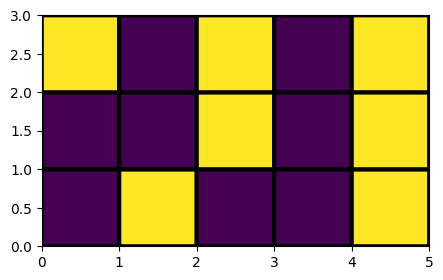

time: 224 ms (started: 2024-07-22 07:35:57 +00:00)


In [ ]:
from matplotlib import pyplot as plt
import random

solution_samples_filtered = list(filter(lambda sample: (sample.fval == 0), qaoa_result.samples))

dg = random.choice(solution_samples_filtered).x.reshape(3,5)

plt.figure(figsize=(5,3))
plt.pcolor(dg[::-1],edgecolors='k', linewidths=3)
plt.show()

## Room placement test

In [ ]:
import numpy as np

def calculate_hamiltonian_value(solution):
    # Define the room requirements
    single_cell_rooms = 12
    two_cell_rooms = 3
    three_four_cell_rooms = 3

    # Calculate the sums of the solution for the different groups
    single_cell_sum = np.sum(solution[:64])
    two_cell_sum = np.sum(solution[64:120])
    three_four_cell_sum = np.sum(solution[120:169])

    # Define the Hamiltonian
    H1 = (single_cell_rooms - single_cell_sum)**2 \
         + (two_cell_rooms - two_cell_sum)**2 \
         + (three_four_cell_rooms - three_four_cell_sum)**2

    return H1

# Example solution (binary array of length 169)
example_solution = np.array([
    # 64 values for single-cell rooms
    0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    # 56 values for two-cell rooms
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,
    # 49 values for three-four-cell rooms
    0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,
])

# Calculate the Hamiltonian value for the example solution
hamiltonian_value = calculate_hamiltonian_value(example_solution)
print(f"Hamiltonian value: {hamiltonian_value}")


Hamiltonian value: 0
